In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 6.7 MB/s 


In [ ]:
import xlsxwriter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import time
from statistics import mean

# Import Data

In [ ]:
# import data train dari traintest.xlsx
df = pd.read_excel("https://github.com/daffaferdiansyah/TuPro3-AI/blob/main/traintest.xlsx?raw=true", sheet_name='train')
df

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


In [ ]:
# import data test dari traintest.xlsx
dfTest = pd.read_excel("https://github.com/daffaferdiansyah/TuPro3-AI/blob/main/traintest.xlsx?raw=true", sheet_name='test').drop('y', axis=1)
dfTest

,id,x1,x2,x3
0,297,43,59,2
1,298,67,66,0
2,299,58,60,3
3,300,49,63,3
4,301,45,60,0
5,302,54,58,1
6,303,56,66,3
7,304,42,69,1
8,305,50,59,2
9,306,59,60,0


#Data Preprocessing



Text(0.5, 1.0, 'Data train sebelum normalisasi')

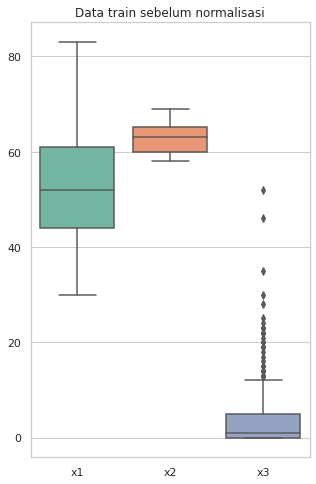

In [ ]:
# menampilkan data train yang belum dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data train sebelum normalisasi')

In [ ]:
# Normalisasi data train menggunakan rumus min-max scaling
dfNorm = pd.DataFrame(index=df.index, columns=df.columns)
xMax = df["x1"].max()
xMin = df["x1"].min()
for i in range(len(df)):
    x = df["x1"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x1"][i] = xNew

xMax = df["x2"].max()
xMin = df["x2"].min()
for i in range(len(df)):
    x = df["x2"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x2"][i] = xNew

xMax = df["x3"].max()
xMin = df["x3"].min()
for i in range(len(df)):
    x = df["x3"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x3"][i] = xNew

dfNorm['x1'] = dfNorm['x1'].astype(float)
dfNorm['x2'] = dfNorm['x2'].astype(float)
dfNorm['x3'] = dfNorm['x3'].astype(float)
dfNorm['y'] = df['y']
dfNorm['id'] = df['id']
dfNorm

,id,x1,x2,x3,y
0,1,0.566038,0.545455,0.000000,1
1,2,0.452830,0.181818,0.211538,0
2,3,0.660377,0.363636,0.423077,0
3,4,0.075472,0.181818,0.000000,1
4,5,0.150943,1.000000,0.403846,0
...,...,...,...,...,...
291,292,0.547170,0.545455,0.019231,1
292,293,0.660377,0.818182,0.000000,1
293,294,0.433962,0.636364,0.230769,0
294,295,0.509434,0.545455,0.019231,0


Text(0.5, 1.0, 'Data train setelah normalisasi')

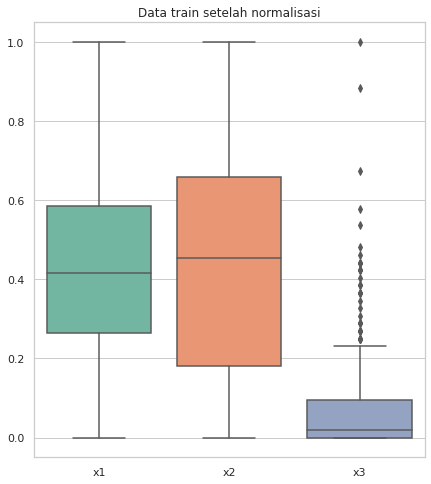

In [ ]:
# menampilkan data train yang sudah dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfNorm[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data train setelah normalisasi')

Text(0.5, 1.0, 'Data test sebelum normalisasi')

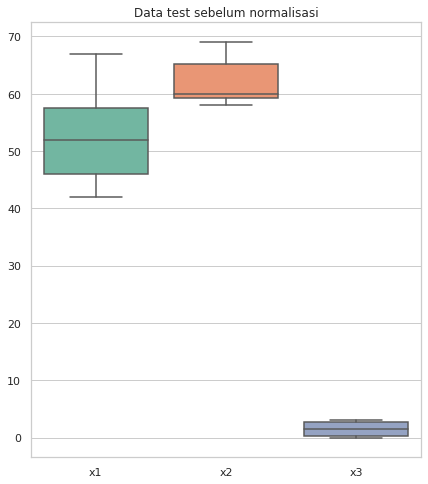

In [ ]:
# menampilkan data test yang belum dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfTest[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data test sebelum normalisasi')

In [ ]:
# Normalisasi data test menggunakan rumus min-max scaling
dfTestNorm = pd.DataFrame(index=dfTest.index, columns=dfTest.columns)
xMax = dfTest["x1"].max()
xMin = dfTest["x1"].min()
for i in range(len(dfTest)):
    x = dfTest["x1"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x1"][i] = float(xNew)

xMax = dfTest["x2"].max()
xMin = dfTest["x2"].min()
for i in range(len(dfTest)):
    x = dfTest["x2"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x2"][i] = float(xNew)

xMax = dfTest["x3"].max()
xMin = dfTest["x3"].min()
for i in range(len(dfTest)):
    x = dfTest["x3"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x3"][i] = float(xNew)

dfTestNorm['x1'] = dfTestNorm['x1'].astype(float)
dfTestNorm['x2'] = dfTestNorm['x2'].astype(float)
dfTestNorm['x3'] = dfTestNorm['x3'].astype(float)
dfTestNorm['id'] = dfTest['id'].astype(str)
dfTestNorm

,id,x1,x2,x3
0,297,0.04,0.090909,0.666667
1,298,1.00,0.727273,0.000000
2,299,0.64,0.181818,1.000000
3,300,0.28,0.454545,1.000000
4,301,0.12,0.181818,0.000000
5,302,0.48,0.000000,0.333333
6,303,0.56,0.727273,1.000000
7,304,0.00,1.000000,0.333333
8,305,0.32,0.090909,0.666667
9,306,0.68,0.181818,0.000000


Text(0.5, 1.0, 'Data test setelah normalisasi')

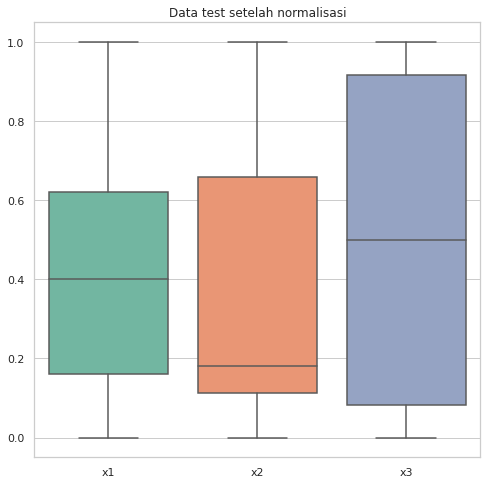

In [ ]:
# menampilkan data test yang sudah dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfTestNorm[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data test setelah normalisasi')

#KNN

In [ ]:
start_time_KNN = time.time()
# Metode Eucledian
def Euclidean(dfNorm, test):
    result = []
    for i in range(len(dfNorm)):
        distancex = math.sqrt((((dfNorm['x1'][i] - test['x1']) ** 2) +
                               ((dfNorm['x2'][i] - test['x2']) ** 2) + 
                               ((dfNorm['x3'][i] - test['x3']) ** 2)))
        result.append([distancex, dfNorm['y'][i]])
    return result

# Metode Manhattan
def Manhattan(dfNorm, test):
    result = []
    for i in range(len(dfNorm)):
        distance = (abs(dfNorm['x1'][i] - test['x1']) + 
                    abs(dfNorm['x2'][i] - test['x2']) + 
                    abs(dfNorm['x3'][i] - test['x3']))
        result.append([distance , dfNorm['y'][i]])
    return result

In [ ]:
# Memanggil fungsi Eucledian, melakukan sort, mengambil k data teratas, dan melakukan label vote
def KNNeuclidean(dfNorm, dfTestNorm, k):
    hasil = []
    for i in range(len(dfTestNorm)):
        distance = Euclidean(dfNorm, dfTestNorm.iloc[[i]])
        distance = sorted(distance, key=lambda x:x[0])
        distanceK = distance[:k]
        satu = 0
        nol = 0 
        for j in range(k):
            if distanceK[j][1] == 1:
                satu += 1
            else:
                nol += 1
        if satu > nol:
            hasil.append([dfTestNorm.loc[i, 'id'], 1])
        else:
            hasil.append([dfTestNorm.loc[i, 'id'], 0])
    dfHasil = pd.DataFrame(hasil, columns = ['id', 'y'])
    return dfHasil

# Memanggil fungsi Manhattan, melakukan sort, mengambil k data teratas, dan melakukan label vote
def KNNmanhattan(dfNorm, dfTestNorm, k):
    hasil = []
    for i in range(len(dfTestNorm)):
        distance = Manhattan(dfNorm, dfTestNorm.iloc[i])
        distance = sorted(distance, key=lambda x:x[0])
        distanceK = distance[:k]
        satu = 0
        nol = 0 
        for j in range(k):
            if distanceK[j][1] == 1:
                satu += 1
            else:
                nol += 1
        if satu > nol:
            hasil.append([dfTestNorm.loc[i, 'id'], 1])
        else:
            hasil.append([dfTestNorm.loc[i, 'id'], 0])
    dfHasil = pd.DataFrame(hasil, columns = ['id', 'y'])
    return dfHasil

def getKNN(dfNorm, dfTestNorm, k):
    return {
        'euclidean' : KNNeuclidean(dfNorm, dfTestNorm, k),
        'manhattan' : KNNmanhattan(dfNorm, dfTestNorm, k)
    }

Melakukan validasi dengan menggunakan rumus eucledian

In [ ]:
def Validation(dfNorm, k):
    testfold1 = dfNorm.iloc[:59].drop('y', axis = 1)
    trainfold1 = dfNorm.iloc[59:].reset_index().drop('index', axis = 1)
    testfold2 = dfNorm.iloc[59:118].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold2 = pd.concat([dfNorm.iloc[:59], dfNorm.iloc[118:]]).reset_index().drop('index', axis = 1)
    testfold3 = dfNorm.iloc[118:177].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold3 = pd.concat([dfNorm.iloc[:118], dfNorm.iloc[177:]]).reset_index().drop('index', axis = 1)
    testfold4 = dfNorm.iloc[177:236].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold4 = pd.concat([dfNorm.iloc[:177], dfNorm.iloc[236:]]).reset_index().drop('index', axis = 1)
    testfold5 = dfNorm.iloc[236:295].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold5 = dfNorm.iloc[0:236].reset_index().drop('index', axis = 1)
    hasilfold1 = getKNN(trainfold1, testfold1, k)
    hasilfold2 = getKNN(trainfold2, testfold2, k)
    hasilfold3 = getKNN(trainfold3, testfold3, k)
    hasilfold4 = getKNN(trainfold4, testfold4, k)
    hasilfold5 = getKNN(trainfold5, testfold5, k)
    accuracy = []
    benar = 0

    # fold 1
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold1['euclidean']['y'][i] == dfNorm['y'][i]:
            benar += 1
    accu = benar / len(hasilfold1['euclidean'])
    accuracy.append(accu)
    
    benar = 0
    # fold 2
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold2['euclidean']['y'][i] == dfNorm.iloc[59:118]['y'][i+59]:
            benar += 1
    accu = benar / len(hasilfold1['euclidean'])
    accuracy.append(accu)
    
    benar = 0
    # fold 3
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold3['euclidean']['y'][i] == dfNorm.iloc[118:177]['y'][i+118]:
            benar += 1
    accu = benar / len(hasilfold1['euclidean'])
    accuracy.append(accu)

    benar = 0
    # fold 4
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold4['euclidean']['y'][i] == dfNorm.iloc[177:236]['y'][i+177]:
            benar += 1
    accu = benar / len(hasilfold1['euclidean'])
    accuracy.append(accu)

    benar = 0
    # fold 5
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold5['euclidean']['y'][i] == dfNorm.iloc[236:295]['y'][i+236]:
            benar += 1
    accu = benar / len(hasilfold1['euclidean'])
    accuracy.append(accu)
    return accuracy
# Hasil Validation #1
print(Validation(dfNorm, k=3))

[0.6610169491525424, 0.7966101694915254, 0.7796610169491526, 0.5423728813559322, 0.711864406779661]


In [ ]:
# Hasil Validation #2
print(Validation(dfNorm, k=7))

[0.6779661016949152, 0.8135593220338984, 0.7796610169491526, 0.5423728813559322, 0.711864406779661]


In [ ]:
# Hasil Validation #3
print(Validation(dfNorm, k=11))

[0.6949152542372882, 0.8305084745762712, 0.8135593220338984, 0.559322033898305, 0.7457627118644068]


In [ ]:
# Hasil Validation #4
print(Validation(dfNorm, k=15))

[0.6949152542372882, 0.847457627118644, 0.847457627118644, 0.6101694915254238, 0.7457627118644068]


In [ ]:
# Hasil Validation #5
print(Validation(dfNorm, k=17))

[0.711864406779661, 0.8305084745762712, 0.8305084745762712, 0.5423728813559322, 0.7457627118644068]


#Testing
Testing menggunakan rumus eucledian dan manhattan

In [ ]:
# pemanggilan fungsi getKNN untuk mendapatkan hasil KNN dari manhattan dan euclidean
KNN = getKNN(dfNorm, dfTestNorm, k=15)

# akhir run program KNN
KNN_time = time.time() - start_time_KNN

KNN['euclidean']

,id,y
0,297,0
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,0
7,304,1
8,305,0
9,306,1


In [ ]:
KNN['manhattan']

,id,y
0,297,1
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,1
7,304,1
8,305,0
9,306,1


In [ ]:
print("Process finished --- %s seconds ---" % KNN_time)

Process finished --- 327.97963285446167 seconds ---


In [ ]:
#di comment karena sudah ada file nya

# with pd.ExcelWriter('KNN.xlsx') as writer:
#     KNN['euclidean'].to_excel(writer, sheet_name='Euclidean', index = False)
#     KNN['manhattan'].to_excel(writer, sheet_name='Manhattan', index = False)

# Naïve Bayes

In [ ]:
start_time_bayes = time.time()

# Memisahkan label y = 1 dan y = 0
def pisah(dfNorm):
  nol = []
  satu = []
  for i in range(len(dfNorm)):
      if dfNorm['y'][i] == 0:
          nol.append([dfNorm['x1'][i], dfNorm['x2'][i], dfNorm['x3'][i], dfNorm['y'][i]])
      else:
          satu.append([dfNorm['x1'][i], dfNorm['x2'][i], dfNorm['x3'][i], dfNorm['y'][i]])
  return nol, satu

# Menghitung mean dan variansi dari tiap label
def getMeanVar(dfNorm):
    nol, satu = pisah(dfNorm)

    dfNol = pd.DataFrame(data = nol, columns = ['x1', 'x2', 'x3', 'y'])
    dfSatu = pd.DataFrame(data = satu, columns = ['x1', 'x2', 'x3', 'y'])

    nolMean = dfNol[['x1', 'x2', 'x3']].mean()
    satuMean = dfSatu[['x1', 'x2', 'x3']].mean()

    nolVar = dfNol[['x1', 'x2', 'x3']].var()
    satuVar = dfSatu[['x1', 'x2', 'x3']].var()
    
    return dfNol, dfSatu, nolMean, satuMean, nolVar, satuVar

In [ ]:
# membuat fungsi untuk menghitung bayesian menggunakan gaussian model
def Bayes(dfNorm, dfTestNorm):
    hasilBayes = []
    dfNol, dfSatu, nolMean, satuMean, nolVar, satuVar = getMeanVar(dfNorm)
    for i in range(len(dfTestNorm)):
        resultNo = ((1/(nolVar['x1'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x1'][i] - nolMean['x1'])/(2 * nolVar['x1']**2)) *
                    (1/(nolVar['x2'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x2'][i] - nolMean['x2'])/(2 * nolVar['x2']**2)) * 
                    (1/(nolVar['x3'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x3'][i] - nolMean['x3'])/(2 * nolVar['x3']**2)) *
                    (len(dfNol)/len(dfNorm)))
        resultYes = ((1/(satuVar['x1'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x1'][i] - satuMean['x1'])/(2 * satuVar['x1']**2)) *
                    (1/(satuVar['x2'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x2'][i] - satuMean['x2'])/(2 * satuVar['x2']**2)) * 
                    (1/(satuVar['x3'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x3'][i] - satuMean['x3'])/(2 * satuVar['x3']**2)) *
                    (len(dfSatu)/len(dfNorm)))
        if resultNo > resultYes:
            hasilBayes.append([dfTestNorm.loc[i, 'id'], 0])
        else:
            hasilBayes.append([dfTestNorm.loc[i, 'id'], 1])
    result = pd.DataFrame(data = hasilBayes, columns = ['id', 'y'])
    return result


bayes_time = (time.time() - start_time_bayes)


In [ ]:
# validasi data menggunakan Bayes
def ValidationBayes(df):
    testfold1 = df.iloc[:59].drop('y', axis = 1)
    trainfold1 = df.iloc[59:].reset_index().drop('index', axis = 1)
    testfold2 = df.iloc[59:118].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold2 = pd.concat([df.iloc[:59], df.iloc[118:]]).reset_index().drop('index', axis = 1)
    testfold3 = df.iloc[118:177].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold3 = pd.concat([df.iloc[:118], df.iloc[177:]]).reset_index().drop('index', axis = 1)
    testfold4 = df.iloc[177:236].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold4 = pd.concat([df.iloc[:177], df.iloc[236:]]).reset_index().drop('index', axis = 1)
    testfold5 = df.iloc[236:295].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold5 = df.iloc[0:236].reset_index().drop('index', axis = 1)
    hasilfold1 = Bayes(trainfold1, testfold1)
    hasilfold2 = Bayes(trainfold2, testfold2)
    hasilfold3 = Bayes(trainfold3, testfold3)
    hasilfold4 = Bayes(trainfold4, testfold4)
    hasilfold5 = Bayes(trainfold5, testfold5)
    accuracy = []
    benar = 0

    # fold 1
    for i in range(len(hasilfold1)):
        if hasilfold1['y'][i] == df['y'][i]:
            benar += 1
    accu = benar / len(hasilfold1)
    accuracy.append(accu)
    
    benar = 0
    # fold 2
    for i in range(len(hasilfold1)):
        if hasilfold2['y'][i] == df.iloc[59:118]['y'][i+59]:
            benar += 1
    accu = benar / len(hasilfold1)
    accuracy.append(accu)
    
    benar = 0
    # fold 3
    for i in range(len(hasilfold1)):
        if hasilfold3['y'][i] == df.iloc[118:177]['y'][i+118]:
            benar += 1
    accu = benar / len(hasilfold1)
    accuracy.append(accu)

    benar = 0
    # fold 4
    for i in range(len(hasilfold1)):
        if hasilfold4['y'][i] == df.iloc[177:236]['y'][i+177]:
            benar += 1
    accu = benar / len(hasilfold1)
    accuracy.append(accu)

    benar = 0
    # fold 5
    for i in range(len(hasilfold1)):
        if hasilfold5['y'][i] == df.iloc[236:295]['y'][i+236]:
            benar += 1
    accu = benar / len(hasilfold1)
    accuracy.append(accu)
    return accuracy

print(ValidationBayes(df))

[0.7288135593220338, 0.8305084745762712, 0.7796610169491526, 0.5932203389830508, 0.7457627118644068]


In [ ]:
resultBayes = Bayes(df, dfTest)
resultBayes

,id,y
0,297,1
1,298,1
2,299,1
3,300,1
4,301,1
5,302,1
6,303,1
7,304,1
8,305,1
9,306,1


In [ ]:
#di comment karena sudah ada file nya

# resultBayes.to_excel('Bayes.xlsx', index = False)

In [ ]:
print("Process finished --- %s seconds ---" % (bayes_time))

Process finished --- 0.04227948188781738 seconds ---
